In [9]:
import pandas as pd
import h5py
import hdf5plugin
from datetime import datetime

# Path to UK-DALE HDF5 file
file_path = '/users/kjain/Downloads/ukdale.h5'

# Define a manual mapping of meters to appliances (Update if needed)
# Define a manual mapping of meters to appliances
meter_mapping = {
    'meter1': 'Main Power',
    'meter2': 'Laptop',
    'meter3': 'Monitor',
    'meter4': 'Speakers',
    'meter5': 'Server',
    'meter6': 'Router',
    'meter7': 'Server HDD',
    'meter8': 'Kettle',
    'meter9': 'Rice Cooker',
    'meter10': 'Running Machine',
    'meter11': 'Laptop 2',
    'meter12': 'Washing Machine',
    'meter13': 'Dishwasher',
    'meter14': 'Fridge',
    'meter15': 'Microwave',
    'meter16': 'Toaster',
    'meter17': 'PlayStation',
    'meter18': 'Modem',
    'meter19': 'Cooker'
}


# Open the HDF5 file
with h5py.File(file_path, 'r') as hdf:
    print("Keys:", list(hdf.keys())) # Check available buildings

    # Navigate to House 1's electricity data
    house_path = 'building2/elec'
    house_data = hdf[house_path]

    # List to store DataFrames for each meter
    meter_dfs = []

    # Process meters (select relevant meters based on mapping)
    for meter_id in meter_mapping.keys():
        meter_path = f"{house_path}/{meter_id}"

        if "table" in house_data[meter_id]:
            print(f"Processing {meter_id} ({meter_mapping[meter_id]})...")
            table_data = house_data[meter_id]['table']
            
            # Read data in chunks (optimized for memory usage)
            timestamps = []
            power_values = []

            for entry in table_data[:500000]: # Read only 500,000 entries at a time
                timestamp, power = entry
                timestamps.append(datetime.utcfromtimestamp(timestamp / 1e9)) # Convert nanoseconds
                power_values.append(power[0]) # Extract first power value

            # Create DataFrame
            df_meter = pd.DataFrame({'timestamp': timestamps, meter_mapping[meter_id]: power_values})

            # Append to list (we will merge later)
            meter_dfs.append(df_meter)

    # Merge all meter DataFrames on timestamp
    df = meter_dfs[0]
    for meter_df in meter_dfs[1:]:
        df = df.merge(meter_df, on='timestamp', how='outer') # Outer join to include all timestamps

    # Convert timestamp to DateTimeIndex
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df.set_index('timestamp', inplace=True)

    # ✅ Filter for January 2013
    df_month = df.loc['2013-02-17':'2013-03-17']

    # Save to CSV
    df_month.to_csv('house2_january2013_some_appliances.csv')

print("✅ Data saved to house2_january2013_some_appliances.csv")

Keys: ['building1', 'building2', 'building3', 'building4', 'building5']
Processing meter1 (Main Power)...
Processing meter2 (Laptop)...
Processing meter3 (Monitor)...
Processing meter4 (Speakers)...
Processing meter5 (Server)...
Processing meter6 (Router)...
Processing meter7 (Server HDD)...
Processing meter8 (Kettle)...
Processing meter9 (Rice Cooker)...
Processing meter10 (Running Machine)...
Processing meter11 (Laptop 2)...
Processing meter12 (Washing Machine)...
Processing meter13 (Dishwasher)...
Processing meter14 (Fridge)...
Processing meter15 (Microwave)...
Processing meter16 (Toaster)...
Processing meter17 (PlayStation)...
Processing meter18 (Modem)...
Processing meter19 (Cooker)...
✅ Data saved to house2_january2013_some_appliances.csv


In [1]:
import pandas as pd
# Load the CSV file
df = pd.read_csv('/Users/kjain/Project/house2_january2013_some_appliances.csv', parse_dates=['timestamp'], index_col='timestamp')

df.describe()


,Main Power,Laptop,Monitor,Speakers,Server,Router,Server HDD,Kettle,Rice Cooker,Running Machine,Laptop 2,Washing Machine,Dishwasher,Fridge,Microwave,Toaster,PlayStation,Modem,Cooker
count,391424.000000,394308.000000,394279.000000,394370.000000,394432.000000,393810.000000,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,389.560862,11.812867,22.710893,6.288676,26.473838,20.042564,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,504.221924,18.625957,29.547885,3.768254,7.085709,4.490423,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,135.000000,0.000000,0.000000,2.000000,0.000000,0.000000,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,193.000000,0.000000,0.000000,3.000000,21.000000,19.000000,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,263.000000,0.000000,0.000000,3.000000,23.000000,19.000000,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,358.000000,16.000000,61.000000,10.000000,28.000000,22.000000,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,5650.000000,1860.000000,486.000000,23.000000,103.000000,222.000000,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/var/folders/sj/1c1l30xn36dgw92bwyf1rn_w0000gp/T/ipykernel_2826/3907611291.py:12: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_resampled = df.resample('1H').mean()


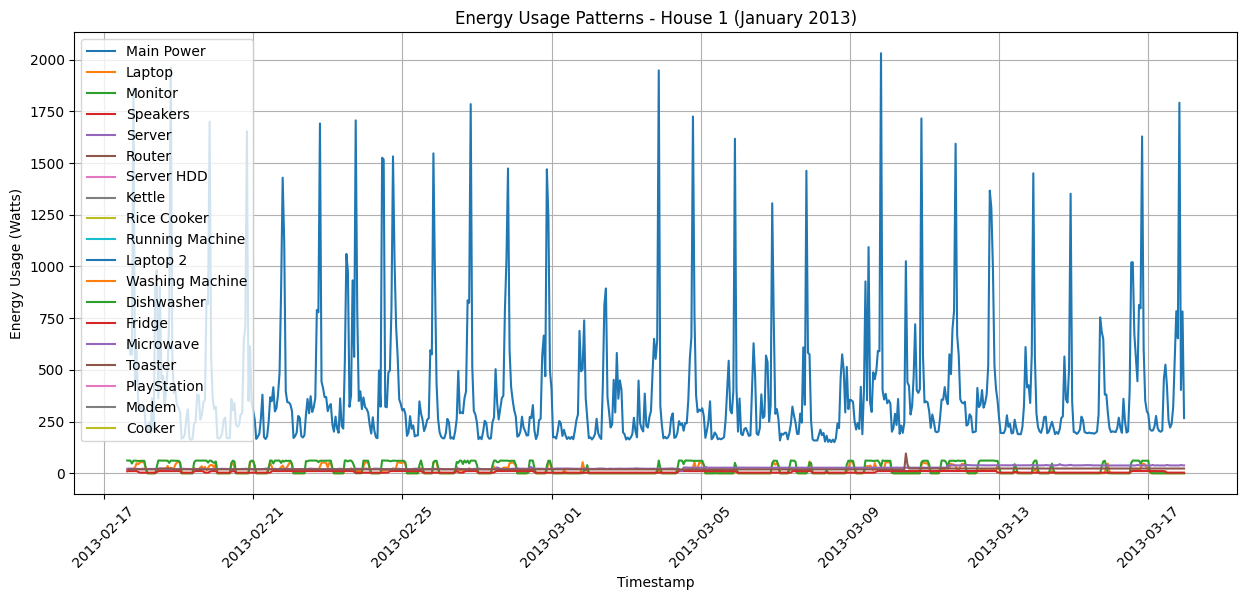

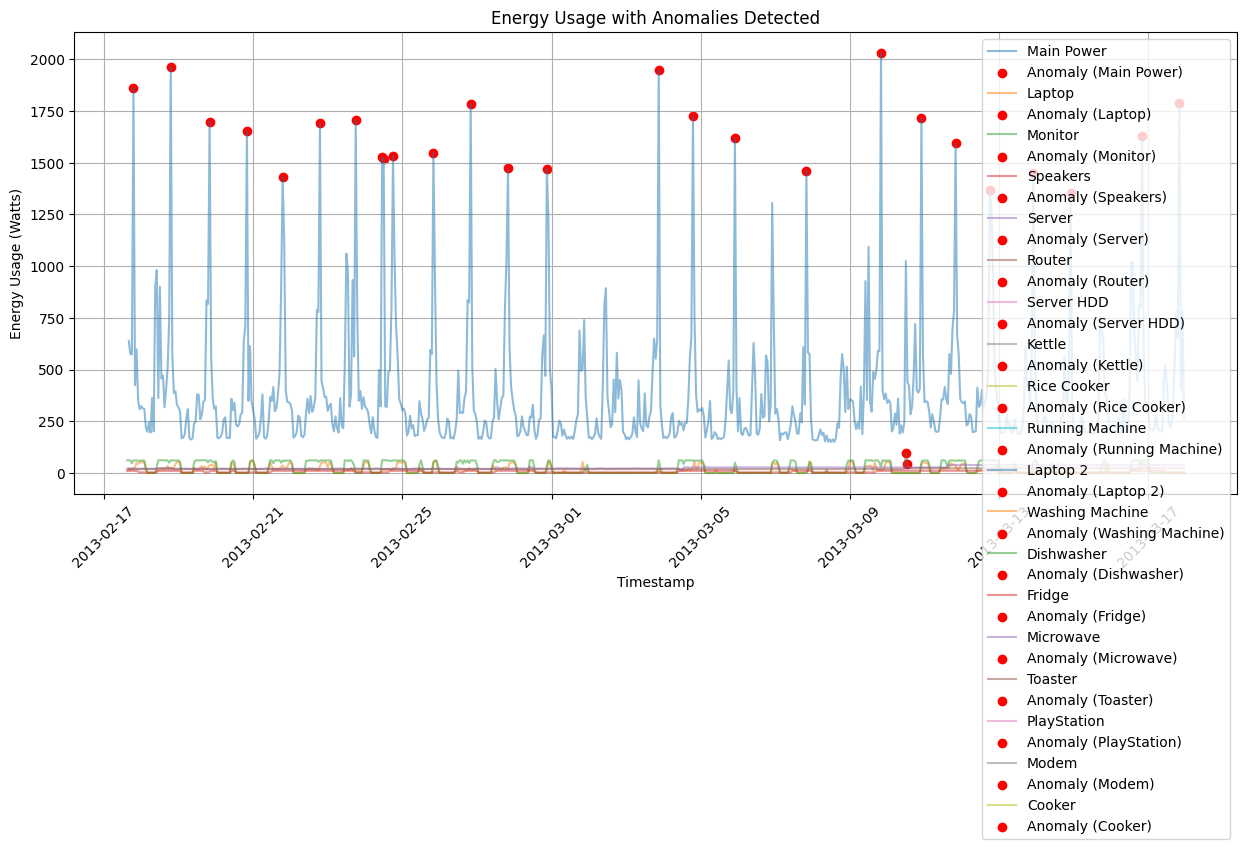


Anomalies in Main Power:
timestamp
2013-02-17 19:00:00    1860.316498
2013-02-18 19:00:00    1960.796610
2013-02-19 20:00:00    1699.309122
2013-02-20 20:00:00    1653.220911
2013-02-21 19:00:00    1428.890034
2013-02-22 19:00:00    1690.937075
2013-02-23 18:00:00    1705.965636
2013-02-24 11:00:00    1525.312287
2013-02-24 12:00:00    1516.924915
2013-02-24 18:00:00    1531.662116
2013-02-25 20:00:00    1546.516239
2013-02-26 20:00:00    1784.486441
2013-02-27 20:00:00    1473.447279
2013-02-28 21:00:00    1469.475214
2013-03-03 21:00:00    1947.415959
2013-03-04 19:00:00    1724.686644
2013-03-05 22:00:00    1617.349233
2013-03-07 20:00:00    1461.954237
2013-03-09 20:00:00    2030.506920
2013-03-10 22:00:00    1715.316327
2013-03-11 20:00:00    1593.058120
2013-03-12 18:00:00    1366.242478
2013-03-13 22:00:00    1449.996575
2013-03-14 22:00:00    1351.302564
2013-03-16 20:00:00    1628.318493
2013-03-17 20:00:00    1791.161290
Name: Main Power, dtype: float64

Anomalies in Laptop:

In [10]:
import pandas as pd
import numpy as np
import hdf5plugin
import h5py
import matplotlib.pyplot as plt

# Load the CSV file
file_path = '/users/kjain/Project/house2_january2013_some_appliances.csv'
df = pd.read_csv(file_path, parse_dates=['timestamp'], index_col='timestamp')

# Resample data to hourly mean to reduce noise
df_resampled = df.resample('1H').mean()

# Plot Time Series Data
plt.figure(figsize=(15, 6))
for column in df_resampled.columns:
    plt.plot(df_resampled.index, df_resampled[column], label=column)

plt.xlabel('Timestamp')
plt.ylabel('Energy Usage (Watts)')
plt.title('Energy Usage Patterns - House 1 (January 2013)')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

# --- Anomaly Detection ---
# Define threshold using standard deviation
threshold = 3 # Adjust this if needed
mean_usage = df_resampled.mean()
std_dev = df_resampled.std()

# Identify anomalies (values beyond mean ± threshold * std deviation)
anomalies = ((df_resampled - mean_usage).abs() > (threshold * std_dev))

# Plot Anomalies
plt.figure(figsize=(15, 6))
for column in df_resampled.columns:
    plt.plot(df_resampled.index, df_resampled[column], label=column, alpha=0.5)
    anomaly_points = df_resampled[column][anomalies[column]]
    plt.scatter(anomaly_points.index, anomaly_points, color='red', label=f'Anomaly ({column})')

plt.xlabel('Timestamp')
plt.ylabel('Energy Usage (Watts)')
plt.title('Energy Usage with Anomalies Detected')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Print anomaly timestamps
for column in df_resampled.columns:
    print(f"\nAnomalies in {column}:")
    print(df_resampled[column][anomalies[column]].dropna())